<a href="https://colab.research.google.com/github/nabinyd/60-Days-of-learning/blob/main/DLPT_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Day 15**

## **Computer Vision Network**

**Computer vision libraries in PyTorch**
 * `torchvision` : base domain library for PyTorch computer vision
 * `torchvision.datasets` : get datasets and data loading functions for computer vision here
 * `torchvision.models` : get pretrained computer vision models that you can leverage for your own problems
 * `torchvision.transforms` : functions for manipulating your vision data (images) to be suitable for use with an ML model
 * `torch.utils.data.Dataset` : Base dataset class for PyTorch
 * `toch.utils.data.DataLoader` : Creates a Python iterable over a dataset  

**What we are going to cover**

* Getting a vision dataset to work with using `torchvision.datasets`
* Architecture of a *convolutional neural network (CNN)* with PyTorch
* An end-to-end multiclass image classification problem
* Steps in modeling with `CNNs in PyTorch`
  * Creating a CNN model with PyTorch
  * Picking a loss and optimizer
  * Picking a loss and optimizer
  * Training a model a model
  * Evaluating a model

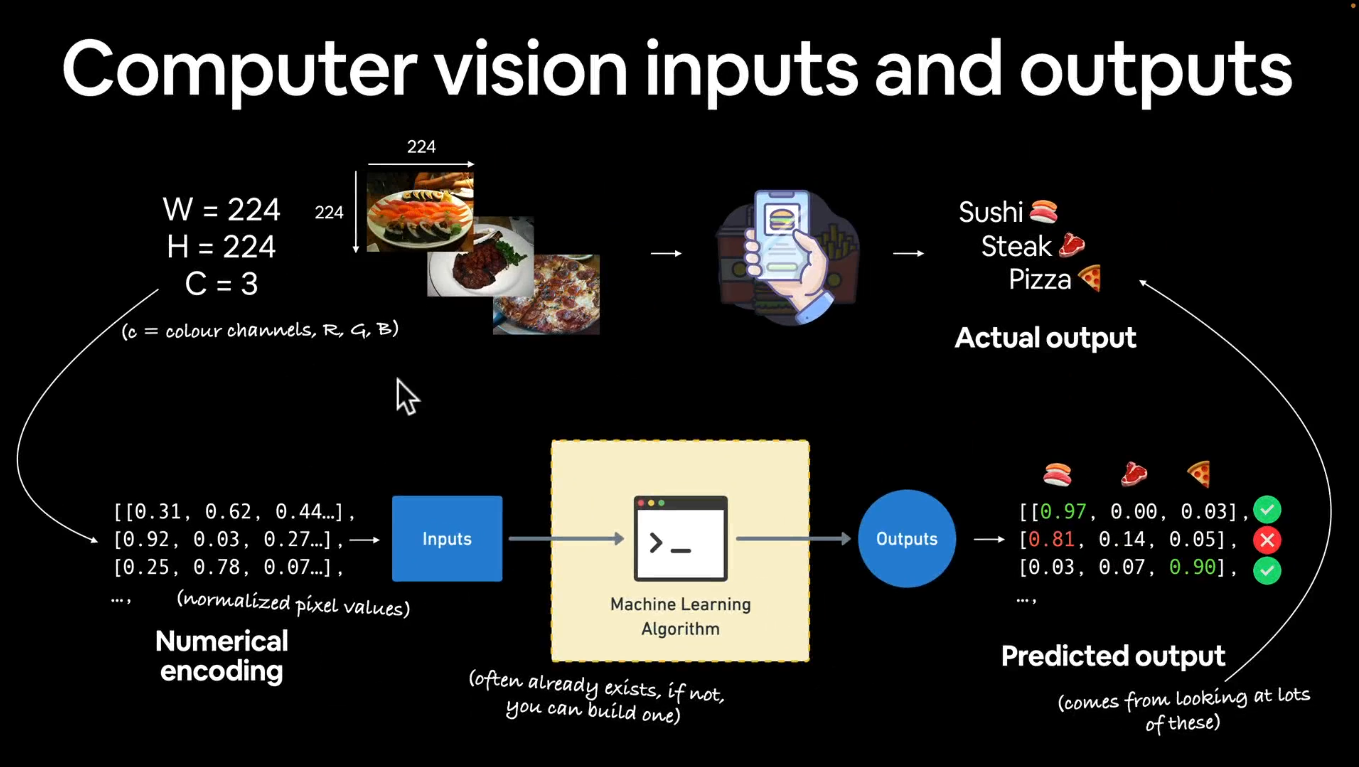

##### Images

## CNN

In [ ]:
# Import PyTorch
import torch
from torch import nn

# Import torchvision
import torchvision
from torchvision import datasets
from torchvision import  transforms
from torchvision.transforms import ToTensor

# import matplotlib for visualization
import matplotlib.pyplot as plt

# Check versions
print(torch.__version__)
print(torchvision.__version__)

2.3.0+cu121
0.18.0+cu121


## Dataset

The dataset we'll be using is FashionMNIST from torchvision.datasets

In [ ]:
 # Setup training data
 from torchvision import datasets
 train_data = datasets.FashionMNIST(root="data",   # where to download data to?
                                    train=True,   #  do we want the training dataset?
                                    download=True,   #  do we want to downlaod yes/no?
                                    transform=torchvision.transforms.ToTensor(),   # how do we want to transform the data?
                                    target_transform=None   # how do we want to transform the labels/targets?
                                    )

 test_data =  datasets.FashionMNIST(root="data",
                                   train=False,
                                   download=True,
                                   transform=torchvision.transforms.ToTensor(),
                                   target_transform=None)

In [ ]:
type(train_data)

torchvision.datasets.mnist.FashionMNIST

In [ ]:
len(train_data), len(test_data)

(60000, 10000)

In [ ]:
# See the first training example
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [ ]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
class_to_idx = train_data.class_to_idx

In [ ]:
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [ ]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [ ]:
# Check the shapes of our images
print(f"Image shape: {image.shape} -> [color_channels, height, width]")
print(f"Image label: {class_names[label]}")

Image shape: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Image label: Ankle boot


## Visualizing our data

Image shape: torch.Size([1, 28, 28])


Text(0.5, 1.0, '9')

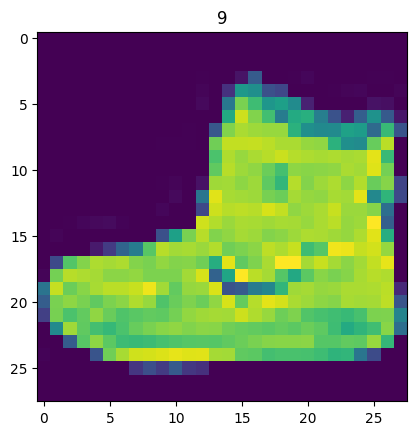

In [ ]:
import matplotlib.pyplot as plt
image, label = train_data[0]
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze())
plt.title(label)

(-0.5, 27.5, 27.5, -0.5)

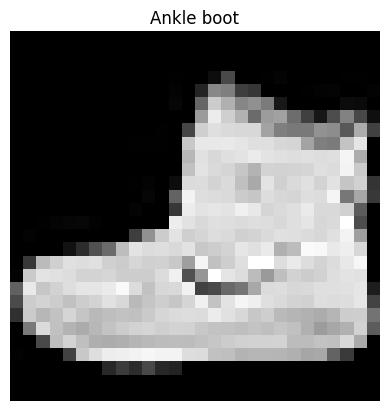

In [ ]:
plt.imshow(image.squeeze(),cmap="gray")
plt.title(class_names[label]);
plt.axis(False)

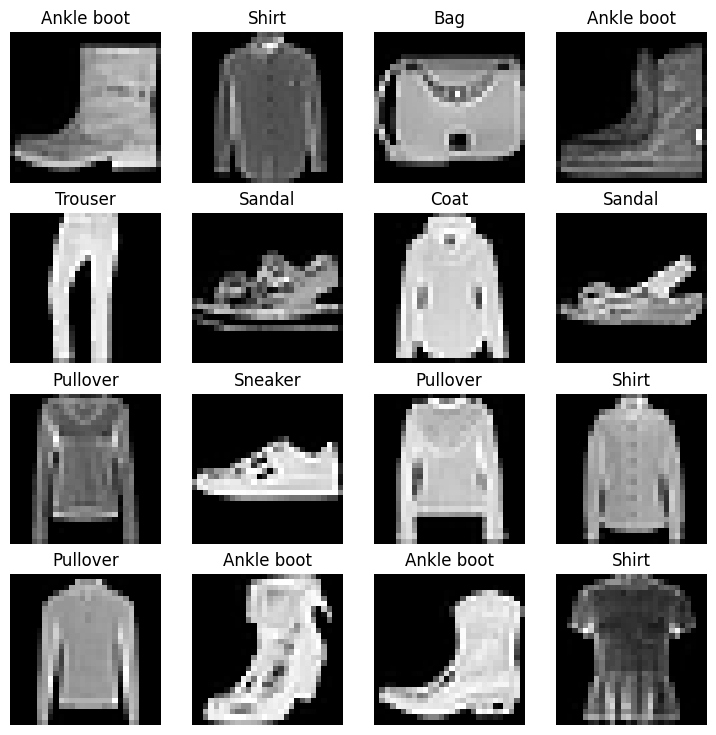

In [ ]:
# Plot more images
torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows, cols = 4,4
for i in range(1, rows * cols + 1):
  random_idx = torch.randint(0, len(train_data),size=[1]).item()
  img, label = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.squeeze(), cmap="gray")
  plt.title(class_names[label])
  plt.axis(False)